### Loaders 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import anderson
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy.stats as stats
pd.pandas.set_option('display.max_columns',None)
from IPython.display import HTML
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from scipy.stats import skew
from scipy.stats.stats import pearsonr

main_train_df = pd.read_csv("C:\\Users\\RICK\\Documents\\Data set\\train.csv")
main_test_df = pd.read_csv("C:\\Users\\RICK\\Documents\\Data set\\test.csv")

In [2]:
main_train_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

### Data summary 

In [3]:
train_df = main_train_df
train_df.drop(columns="Id", inplace = True)
test_df = main_test_df
print("Data shape:",train_df.shape)
print()
type_ls = []
type_dict = {}
for col in train_df.columns:
    if train_df[col].dtype not in type_ls:
        type_ls.append(train_df[col].dtype)
        type_dict[train_df[col].dtype] = 1
    else:
        counter = type_dict[train_df[col].dtype]
        type_dict[train_df[col].dtype] = counter + 1
print("Feature datatypes:")
for key, value in type_dict.items():
    print(key,"->",value)    
print()
print("Features with NA values more than 20%:")
for col in train_df.columns:
    na_ptg = round(100*(train_df[col].isna().sum()/len(train_df)),2)
    if na_ptg >= 20:
        print("{} -> {}".format(col, na_ptg))
print()
print("Data description:\n")
train_df.describe()

Data shape: (1460, 80)

Feature datatypes:
int64 -> 34
object -> 43
float64 -> 3

Features with NA values more than 20%:
Alley -> 93.77
FireplaceQu -> 47.26
PoolQC -> 99.52
Fence -> 80.75
MiscFeature -> 96.3

Data description:



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* The data provided has 1460 unique data-points along with 81 columns.
* There are 35 "Integer" type columns, 43 columns of type "Object" and 3 of "Float" type.
* There are 4 columns with blank values (>50%), they are: Alley (93.77%), PoolQC (99.52%), Fence (80.75%) and MiscFeature (96.3%).

In [4]:
numeric_discrete_vars = []
categorical_vars = []
numeric_vars = []
for col in train_df.columns:
    if train_df[col].dtype == "object":
        categorical_vars.append(col)
    elif len(train_df[col].unique()) < 25:
           numeric_discrete_vars.append(col)
    else:
        numeric_vars.append(col)
print("Numeric Discrete variables:\n",numeric_discrete_vars)
print()
print("Categorical variables:\n",categorical_vars)
print()
print("Numeric variables:\n",numeric_vars)

Numeric Discrete variables:
 ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Categorical variables:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Numeric variables:
 ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'

### 1. Data visualization, Variable analysis and EDA

In [5]:
corr = train_df[numeric_vars].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.402797,0.070250,0.344997,0.088521,0.151972,0.010700,0.041383,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,-0.024947,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,0.199010,0.825667,0.478954,0.224880,0.188686,-0.387268,-0.050364,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,0.287389,0.642277,0.371600,0.205726,0.226298,-0.193919,-0.038740,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,0.390857,0.252691,0.373066,0.159718,0.125703,-0.110204,0.061466,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.153484,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.088011,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.190708,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.322445,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.233449,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852


In [6]:
high_cor_feat = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.5:
            colname = corr.columns[i]
            high_cor_feat.add(colname)
print("Highly correlated features:\n",high_cor_feat)

Highly correlated features:
 {'SalePrice', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt'}


* There are outliers present in GrLivArea and GarageArea. These two area features show high correlations.
* BsmtFinSF1 is highly negatively correlated with BsmtUnfSF. GrLivArea has a high correlation with the TotRmsAbvGrd, GarageCars has a high correlation with the GarageArea and vice-versa.
* Majority of the GarageArea are between 300 and 700. A large number of GrLivArea are between 1000 and 2500.
* The Slope between GrLivArea and SalePrice is steeper than GarageArea and SalePrice.

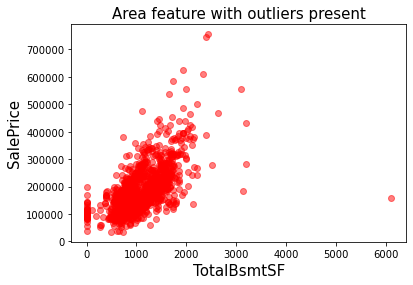

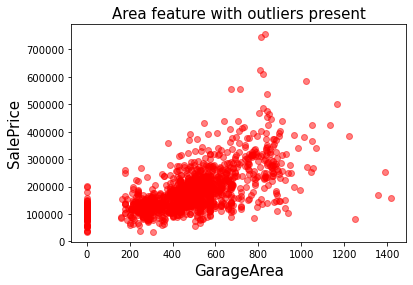

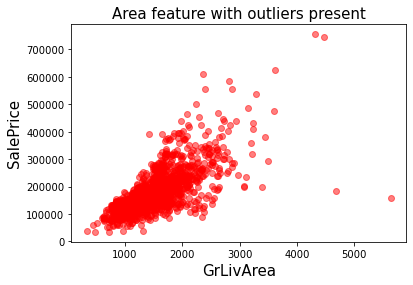

In [7]:
for i in ['TotalBsmtSF', 'GarageArea', 'GrLivArea']:
    fig, ax = plt.subplots()
    ax.set_title("Area feature with outliers present", fontsize=15)
    ax.scatter(x = train_df[i], y = train_df['SalePrice'], alpha = 0.5, c="red")
    plt.ylabel('SalePrice', fontsize=15)
    plt.xlabel(i, fontsize=15)
    plt.show()

The space or area related features having a correlation more than 50% have been plotted in the above. The plots  show that they have many outliers. The presence of outliers can often lead to a fluctuating correlation factor. 

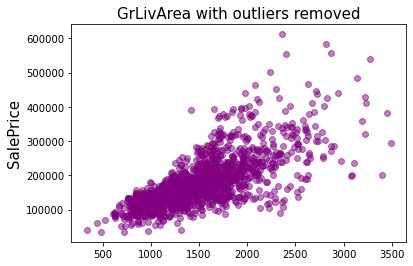

In [8]:
train_NoOutlier = train_df[train_df.GrLivArea < 3500]
fig, ax = plt.subplots()
ax.set_title("GrLivArea with outliers removed", fontsize=15)
ax.scatter(x=train_NoOutlier['GrLivArea'], y=train_NoOutlier['SalePrice'], alpha = 0.5, c="purple")
plt.ylabel('SalePrice', fontsize=15)
plt.show()

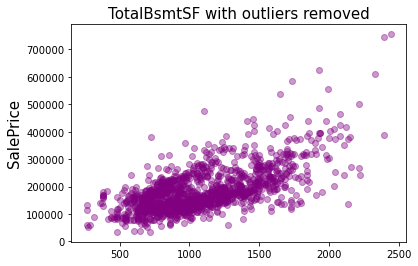

In [9]:
train_NoOutlier = train_df[(train_df.TotalBsmtSF < 2500) & (train_df.TotalBsmtSF > 200)]
fig, ax = plt.subplots()
ax.set_title("TotalBsmtSF with outliers removed", fontsize=15)
ax.scatter(x=train_NoOutlier['TotalBsmtSF'], y=train_NoOutlier['SalePrice'], alpha = 0.4, c="purple")
plt.ylabel('SalePrice', fontsize=15)
plt.show()

The demonstration done manually shows that the outliers have been removed from GrLivArea and TotalBsmtSF features. They have been plotted against SalePrice.

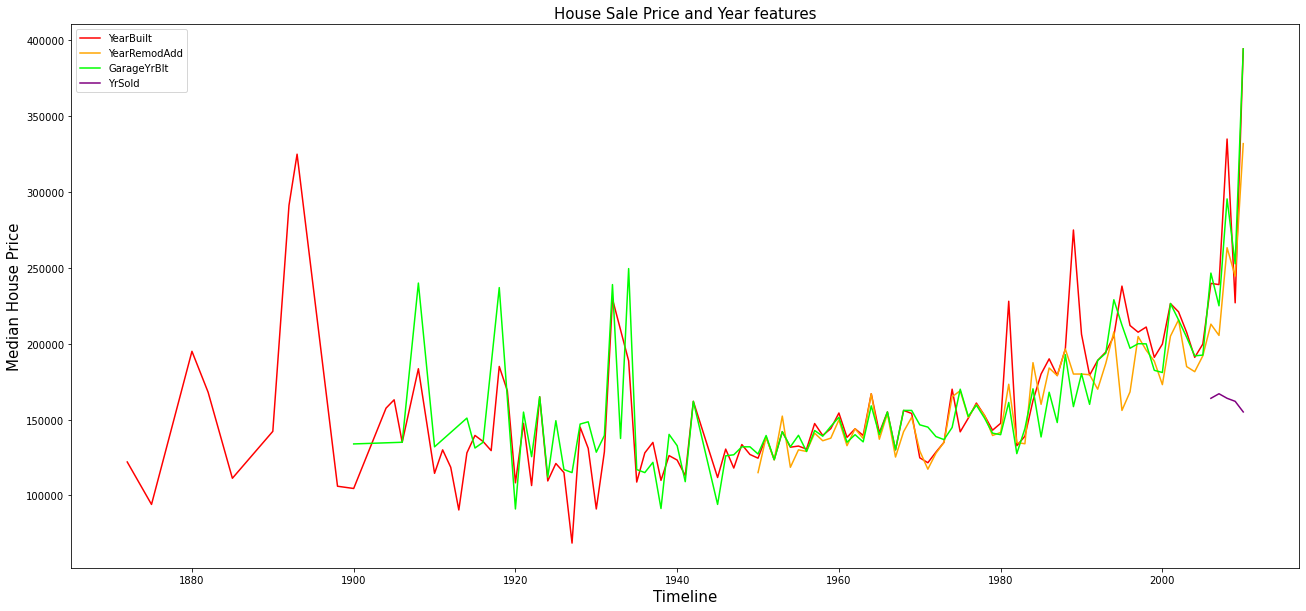

In [10]:
plot_df = train_df.copy()
col_colr = ["red", "orange", "lime", "purple"]
labels = [i for i in train_df.columns if "Yr" in i or "Year" in i]
cont = 0
for year_cols in labels:
    if "Yr" in year_cols or "Year" in year_cols: 
        temp_df = plot_df.groupby(year_cols)["SalePrice"].median()
        temp_df.plot(color = col_colr[cont], figsize=(22,10))
        plt.xlabel("Timeline", size=15)
        plt.legend(labels = labels)
        plt.ylabel("Median House Price", size=15)
        plt.title("House Sale Price and Year features", size=15)
        cont += 1

* From the above time-series visualization, we can see that with an increase in built year or year of establishment of a house YearBuilt, there is an increase in median price. In other words, if a house is recently built, it's median SP is highly likely to be more than a house which was built a decade earlier.
* The same goes with house garage built year GarageYrBlt and house remodification year YearRemodAdd.
* The year of selling YrSold is just the opposite as the median price is seen to be decreasing with an increasing in the year of house getting sold, i.e the houses sold recently have lower median price than the houses sold a few years back.

Text(0.5, 0, 'Skewed SalePrice')

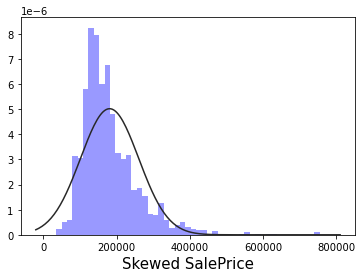

In [11]:
value = train_df["SalePrice"]
sns.distplot(value, kde=False, fit=stats.norm, color = "blue")
plt.xlabel("Skewed SalePrice", size = 15)

In [12]:
norm_test = anderson(train_df["SalePrice"])
print("Anderson Darling test of Normality:")
norm_test

Anderson Darling test of Normality:


AndersonResult(statistic=41.69199630641583, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

SalesPrice isn't following a normal distibution as it is right-skewed. From the Aderson Darling test, we have achieved a statistic or around 41.69. We have also obtained a list of critical values which are far less than the statistic value. Thus, we can infer that the distribution in the data isn't Normal, thus fails to accept the null hypothesis. A Log transformation might change the shape of the distribution.

Text(0.5, 0, 'Log transformed SalePrice')

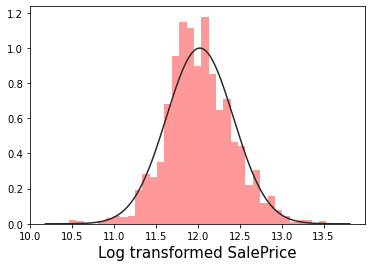

In [13]:
SP_Log_Trnsfmd = train_df["SalePrice"].copy()
SP_Log_Trnsfmd = SP_Log_Trnsfmd.apply(lambda x: np.log1p(x))
sns.distplot(SP_Log_Trnsfmd, kde=False, fit=stats.norm, color = "red")
plt.xlabel("Log transformed SalePrice", size = 15)

Log transformation demonstration performed on "SalePrice". As the distribution of the dependent variable looks normal, a Linear model can be fit on the variable.

In [14]:
print("Top 20 important features as per correlation values and SalePrice:")
corr = abs(train_df.corr())
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
print(corr.SalePrice[1:21])
Imp_feat_df = pd.DataFrame(corr.SalePrice[1:11])
Imp_feat_df.rename(columns = {"SalePrice": "Importance"}, inplace = True)

Top 20 important features as per correlation values and SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64


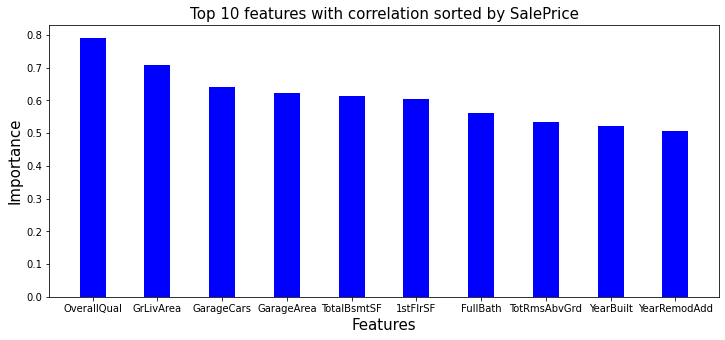

In [15]:
x = list(Imp_feat_df.index) 
y = list(Imp_feat_df['Importance'])  
fig = plt.figure(figsize = (12, 5)) 
plt.bar(x, y, color ='blue',  
        width = 0.4)
plt.xlabel("Features", size=15) 
plt.ylabel("Importance", size=15) 
plt.title("Top 10 features with correlation sorted by SalePrice", size=15) 
plt.show() 

The above plot is demonstrating the top 10 important features w.r.t their correlation factors against the y-variable SalePrice.
This is a correlation sorted by SalePrice values, which is our dependent variable. 

Top 5 important features and their distributions:


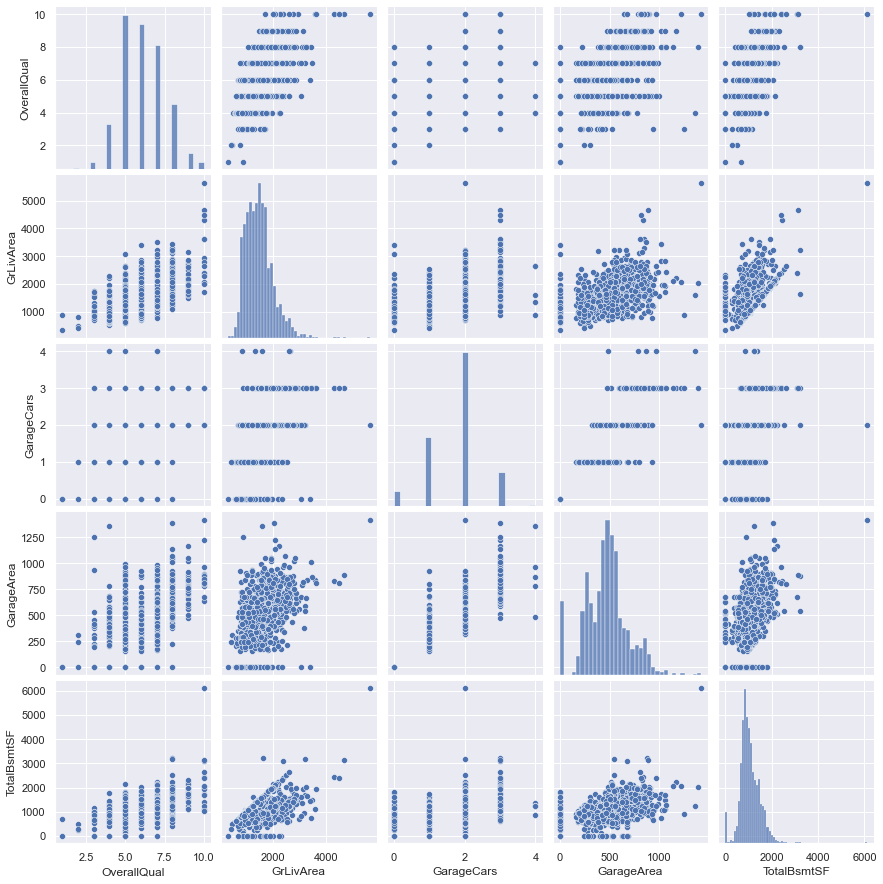

In [16]:
print("Top 5 important features and their distributions:")
Imp_feat_df["Feature"] = Imp_feat_df.index
Imp_feat_df.set_index(np.arange(1,11))
important_feats = [i for i in Imp_feat_df["Feature"]]
sns.set()
cols = important_feats[:5]
sns.pairplot(train_df[cols], height = 2.5)
plt.show();

* OverallQual and GrLivArea are strongly correlated with the target variable with 0.82 and 0.7.
* GarageCars, GarageArea, TotalBsmtSF, etc. follows the top 2 important variables w.r.t SalePrice.
* GarageCars and GarageArea follow an almost similar correlation w.r.t SalePrice. More number of cars one would grab, much larger space that individual would need. That would iventually play an important role deciding the price of his/her plot.
* Higher the quality of a house overall OverallQual, higher is the price of a house. The OverallQual has a high correlation with the target variable.
* The presence of outliers are prominent in every features. Some of them are not showing a linear relationship as well. The ouliers are making those features important.  

In [17]:
def imp_feat(name, vars_ls):
    print(f"Top 20 important {name} as per correlation values and SalePrice:")
    cols = vars_ls
    cols.append('SalePrice')
    for c in cols:
        if c == 'SalePrice' and cols.count(c) > 1:
            cols.pop()
    corr = abs(train_df[cols].corr())
    corr.sort_values(['SalePrice'], ascending=False, inplace=True)
    print(corr.SalePrice[1:21])
imp_feat("Discrete variables", numeric_discrete_vars)
print()
imp_feat("Mumeric variables", numeric_vars)

Top 20 important Discrete variables as per correlation values and SalePrice:
OverallQual     0.790982
GarageCars      0.640409
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
HalfBath        0.284108
BsmtFullBath    0.227122
BedroomAbvGr    0.168213
KitchenAbvGr    0.135907
PoolArea        0.092404
MSSubClass      0.084284
OverallCond     0.077856
MoSold          0.046432
3SsnPorch       0.044584
YrSold          0.028923
LowQualFinSF    0.025606
MiscVal         0.021190
BsmtHalfBath    0.016844
Name: SalePrice, dtype: float64

Top 20 important Mumeric variables as per correlation values and SalePrice:
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843


Top 20 highly correlated features w.r.t SalePrice demonstrated seperately as per column data types. We can estimate the important features from the values above shown seperately. 

### 2. Data cleaning and pre-processing

In [18]:
train_df[categorical_vars] = train_df[categorical_vars].fillna('None')

The NULL values in the categorical variables are replaced with None in order to fill the missing values.

In [19]:
for col in numeric_vars:
    train_df[col].fillna(train_df[col].median(),inplace=True)

The NULL values in the numeric variables are replaced with Median of each variables in order to fill the missing values.

In [20]:
for col in numeric_discrete_vars:
    train_df[col].fillna(train_df[col].median(),inplace=True)

The NULL values in the discrete variables are replaced with Median of each variables in order to fill the missing values.

In [21]:
train_df["SalePrice"] = train_df["SalePrice"].apply(lambda x: np.log1p(x))
train_df["SalePrice"].skew()

0.12134661989685333

The dependent variable SalePrice has been Log transformed in order to remove skewness from it.  

In [22]:
for col in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:  
    train_df[col] = train_df['YrSold'] - train_df[col]

Replacing year related variables with related age in values. The data of getting sold YrSold column is marked as the end date. This is done to gain some coefficient values from those columns. 

In [23]:
for col in numeric_vars:
    train_df[col] = train_df[col].apply(lambda x: np.log1p(x))

Log transform on the numeric features as well in order to remove skewness.

In [24]:
print("Unique values in all the categorical variables:")
_encoder = preprocessing.LabelEncoder() 
for col in categorical_vars:  
    train_df[col] = _encoder.fit_transform(train_df[col])
    unique = list(set(train_df[col]))
    print(f"{col} -> {unique}")

Unique values in all the categorical variables:
MSZoning -> [0, 1, 2, 3, 4]
Street -> [0, 1]
Alley -> [0, 1, 2]
LotShape -> [0, 1, 2, 3]
LandContour -> [0, 1, 2, 3]
Utilities -> [0, 1]
LotConfig -> [0, 1, 2, 3, 4]
LandSlope -> [0, 1, 2]
Neighborhood -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Condition1 -> [0, 1, 2, 3, 4, 5, 6, 7, 8]
Condition2 -> [0, 1, 2, 3, 4, 5, 6, 7]
BldgType -> [0, 1, 2, 3, 4]
HouseStyle -> [0, 1, 2, 3, 4, 5, 6, 7]
RoofStyle -> [0, 1, 2, 3, 4, 5]
RoofMatl -> [0, 1, 2, 3, 4, 5, 6, 7]
Exterior1st -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Exterior2nd -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
MasVnrType -> [0, 1, 2, 3]
ExterQual -> [0, 1, 2, 3]
ExterCond -> [0, 1, 2, 3, 4]
Foundation -> [0, 1, 2, 3, 4, 5]
BsmtQual -> [0, 1, 2, 3, 4]
BsmtCond -> [0, 1, 2, 3, 4]
BsmtExposure -> [0, 1, 2, 3, 4]
BsmtFinType1 -> [0, 1, 2, 3, 4, 5, 6]
BsmtFinType2 -> [0, 1, 2, 3, 4, 5, 6]
Heating -> [0, 1, 2, 3, 

Applying label encoding method on all the category features to convert each label into numeric discrete values. 

In [25]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.fillna(train_df.mean(), inplace=True)
scale_feats = [cols for cols in train_df.columns if cols != 'SalePrice']
scale = MinMaxScaler()
scale.fit(train_df[scale_feats])
scale.transform(train_df[scale_feats])

array([[0.23529412, 0.75      , 0.41326841, ..., 0.5       , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.49030656, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.42998996, ..., 0.5       , 1.        ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.41892525, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.42998996, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.46633838, ..., 0.5       , 1.        ,
        0.8       ]])

Min-Max Scaling is applied on the data set to scale all the independent variables under an unified standard. This is to avoid variation in values non-uniformity in units.  

In [26]:
train_df_prepared = pd.DataFrame(scale.transform(train_df[scale_feats]), columns = scale_feats)
train_df_prepared = pd.concat([train_df_prepared, train_df['SalePrice']], axis = 1)
print("Tranformed and prepared data set:")
train_df_prepared.to_csv("House_Train_DF.csv")
train_df_prepared.head(20)

Tranformed and prepared data set:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.413268,0.366271,1.0,0.5,1.000000,1.0,0.0,1.00,0.0,0.208333,0.250,0.285714,0.00,0.714286,0.666667,0.500,0.364180,0.435859,0.2,0.142857,0.857143,0.866667,0.333333,0.716038,0.666667,1.0,0.4,0.50,1.00,0.75,0.333333,0.759508,1.000000,0.000000,0.646838,0.774668,0.2,0.0,1.0,1.0,0.355839,0.884420,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.000000,0.000000,0.6,0.166667,0.382680,0.666667,0.50,0.869159,1.0,1.0,1.0,0.000000,0.654449,0.000000,0.000000,0.000000,0.0,1.0,1.00,0.25,0.000000,0.090909,0.50,1.00,0.8,2.583824
1,0.000000,0.75,0.490307,0.391245,1.0,0.5,1.000000,1.0,0.0,0.50,0.0,1.000000,0.125,0.285714,0.00,0.285714,0.555556,0.875,0.704421,0.843065,0.2,0.142857,0.571429,0.533333,0.666667,0.000000,1.000000,1.0,0.2,0.50,1.00,0.25,0.000000,0.797188,1.000000,0.000000,0.728731,0.819153,0.2,0.0,1.0,1.0,0.502753,0.000000,0.0,0.469935,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.000000,0.333333,1.0,0.166667,0.740205,0.666667,0.50,0.845088,1.0,1.0,1.0,0.843935,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.00,0.25,0.000000,0.363636,0.25,1.00,0.8,2.573300
2,0.235294,0.75,0.429990,0.422289,1.0,0.5,0.000000,1.0,0.0,1.00,0.0,0.208333,0.250,0.285714,0.00,0.714286,0.666667,0.500,0.422652,0.473357,0.2,0.142857,0.857143,0.866667,0.333333,0.690361,0.666667,1.0,0.4,0.50,1.00,0.50,0.333333,0.716357,1.000000,0.000000,0.783246,0.782930,0.2,0.0,1.0,1.0,0.383123,0.886245,0.0,0.592825,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.000000,0.333333,1.0,0.166667,0.444123,0.666667,0.50,0.883450,1.0,1.0,1.0,0.000000,0.596422,0.000000,0.000000,0.000000,0.0,1.0,1.00,0.25,0.000000,0.727273,0.50,1.00,0.8,2.589054
3,0.294118,0.75,0.383633,0.390223,1.0,0.5,0.000000,1.0,0.0,0.00,0.0,0.250000,0.250,0.285714,0.00,0.714286,0.666667,0.500,0.919066,0.878382,0.2,0.142857,0.928571,1.000000,0.666667,0.000000,1.000000,1.0,0.0,1.00,0.25,0.75,0.000000,0.622780,1.000000,0.000000,0.811361,0.760436,0.2,0.5,1.0,1.0,0.399623,0.868471,0.0,0.578882,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.000000,0.333333,0.4,0.833333,0.469279,1.000000,0.75,0.890935,1.0,1.0,1.0,0.000000,0.568247,0.888227,0.000000,0.000000,0.0,1.0,1.00,0.25,0.000000,0.090909,0.00,1.00,0.0,2.553297
4,0.235294,0.75,0.508439,0.468694,1.0,0.5,0.000000,1.0,0.0,0.50,0.0,0.625000,0.250,0.285714,0.00,0.714286,0.777778,0.500,0.446592,0.534491,0.2,0.142857,0.857143,0.866667,0.333333,0.794318,0.666667,1.0,0.4,0.50,1.00,0.00,0.333333,0.750841,1.000000,0.000000,0.798858,0.808002,0.2,0.0,1.0,1.0,0.465926,0.911832,0.0,0.666289,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,1.0,0.166667,0.469279,0.666667,0.75,0.927266,1.0,1.0,1.0,0.779126,0.704481,0.000000,0.000000,0.000000,0.0,1.0,1.00,0.25,0.000000,1.000000,0.50,1.00,0.8,2.597433
5,0.176471,0.75,0.512839,0.466694,1.0,0.5,0.000000,1.0,0.0,1.00,0.0,0.458333,0.250,0.285714,0.00,0.000000,0.444444,0.500,0.575859,0.658753,0.2,0.142857,0.857143,0.866667,0.666667,0.000000,1.000000,1.0,1.0,0.50,1.00,0.75,0.333333,0.763689,1.000000,0.000000,0.538171,0.766342,0.2,0.0,1.0,1.0,0.328342,0.830611,0.0,0.496917,0.333333,0.0,0.333333,0.5,0.125